# Proyecto integrado

### En éste proyecto se realizará el análisis de las diferente compañias que realizan videojuegos, para identificar patrones y así poder determinar si un videojuego tendrá exito o no el sieguiete año.

### El análisis se realizara en 3 etapas:
 1. Análisis exploratorio.
 2. Anáñisis de los datos.
 3. Pruebas de hipótesis.

*Para comenzar con el análisis promero validaremos la calidad de los datos, identificando los posibles errores y falta de información.*

**Tratamiento del dataset:**
1. Reeplazaremos los nombres de las columnas modificandolos a letras minusculas.
2. Convertiremos los datos al tipo que sea necesario.
3. Descripción del porque se realizó el cambio de tipo de dato.
4. Trataremos los valores ausentes (se agregará explicación del como y porque de esa forma).
5. Calcularemos las ventas total y las agregaremos al dataset original.

**1.1 Importacion de librerías**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.ticker as ticker

**1.2 Importamos DataSet**

In [2]:
games = pd.read_excel('C:/Users/ralf_/Documents/Proyectos/poryecto_integrado/games.xlsx')

**1.3 Validamos la estructura de nuesto df**

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16467 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16716 non-null  float64
 5   EU_sales         16717 non-null  float64
 6   JP_sales         16716 non-null  float64
 7   Other_sales      16716 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**1.4 Modificaremos los nombres de columnas para que se muestresn en minusculas**

In [5]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**1.5 Tratamiento de datos ausentes:**
* Name: Se liminarán las filas sin nombre de juego ya que no contienen información en ninguna de las columnas y la fila que contiene datos, parece más bien un error.
* Year_of_relase: se eliminarán los datos ausentes ya que no podemos obtener el año de todo los registros salvo de los que en el nombre indica el año.
* Critic_score: Se sustituirán los valores ausentes por la media de los valores.
* User_score: Se sustituirán los valores 'tdb' con valor a 0 para que podamos convertir los valores a tipo float y de esa manera poder aplicar operaciones necesarias para el anális.
* Rating: Se sustituirán los valor nan por unclassified.

In [6]:
#Eliminamos filas nan
games = games.dropna(subset= ['name'])
games = games.dropna(subset= ['year_of_release'])
#Sustituimos valores nan por la media
games['critic_score'] = games['critic_score'].fillna(games['critic_score'].mean())


games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16465 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16465 non-null  object 
 1   platform         16465 non-null  object 
 2   year_of_release  16465 non-null  float64
 3   genre            16465 non-null  object 
 4   na_sales         16465 non-null  float64
 5   eu_sales         16465 non-null  float64
 6   jp_sales         16465 non-null  float64
 7   other_sales      16465 non-null  float64
 8   critic_score     16465 non-null  float64
 9   user_score       9855 non-null   object 
 10  rating           9783 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [7]:
#Sustituimos valores tbd por 0
games['user_score'] = games['user_score'].replace('tbd', 0)
#Convertimos valores a tipo float
games['user_score'] = games['user_score'].astype(float)
#Sustituimos valores nan por la media
games['user_score'] = games['user_score'].fillna(games['user_score'].mean())

games.head(100)

C:\Users\ralf_\AppData\Local\Temp\ipykernel_13964\3591444843.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  games['user_score'] = games['user_score'].replace('tbd', 0)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.006626,5.407519,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,69.006626,5.407519,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,3.78,2.17,1.31,0.31,69.006626,5.407519,NaN
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,69.006626,5.407519,NaN
97,Super Mario Galaxy 2,Wii,2010.0,Platform,3.56,2.35,0.98,0.62,97.000000,9.100000,E
98,Super Mario Bros. 2,NES,1988.0,Platform,5.39,1.18,0.70,0.19,69.006626,5.407519,NaN


*Reemplazamos los valores 'tbd' por '0' ya que requerimos hacer operaciones con esa columna más adelante, finalmente podemos ibviar que el registro user_score = tbd significa que no tiene registro por tanto es = 0*

In [8]:
#Sustituimos valores nan por unclassified
games['rating'] = games['rating'].fillna('unclassified')

games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16465 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16465 non-null  object 
 1   platform         16465 non-null  object 
 2   year_of_release  16465 non-null  float64
 3   genre            16465 non-null  object 
 4   na_sales         16465 non-null  float64
 5   eu_sales         16465 non-null  float64
 6   jp_sales         16465 non-null  float64
 7   other_sales      16465 non-null  float64
 8   critic_score     16465 non-null  float64
 9   user_score       16465 non-null  float64
 10  rating           16465 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


**1.6 Cambio de tipo de datos:**
* Year_of_relase de tipo float se cambiará a int ya que solo contamos con el año y no con la fecha completa.


In [9]:
games['year_of_release'] = games['year_of_release'].astype(int)
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16465 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16465 non-null  object 
 1   platform         16465 non-null  object 
 2   year_of_release  16465 non-null  int64  
 3   genre            16465 non-null  object 
 4   na_sales         16465 non-null  float64
 5   eu_sales         16465 non-null  float64
 6   jp_sales         16465 non-null  float64
 7   other_sales      16465 non-null  float64
 8   critic_score     16465 non-null  float64
 9   user_score       16465 non-null  float64
 10  rating           16465 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**1.6 Agregamos el total de las ventas por región y videojuego**

In [10]:
# Creamos la columna que contiene el total de ventas
games['total_sales'] = (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.006626,5.407519,unclassified,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69.006626,5.407519,unclassified,31.38


## Análisis exploratio

**2.1 Analizaremos si los lanzamientos a través de tiempo son significativos en todos los años**

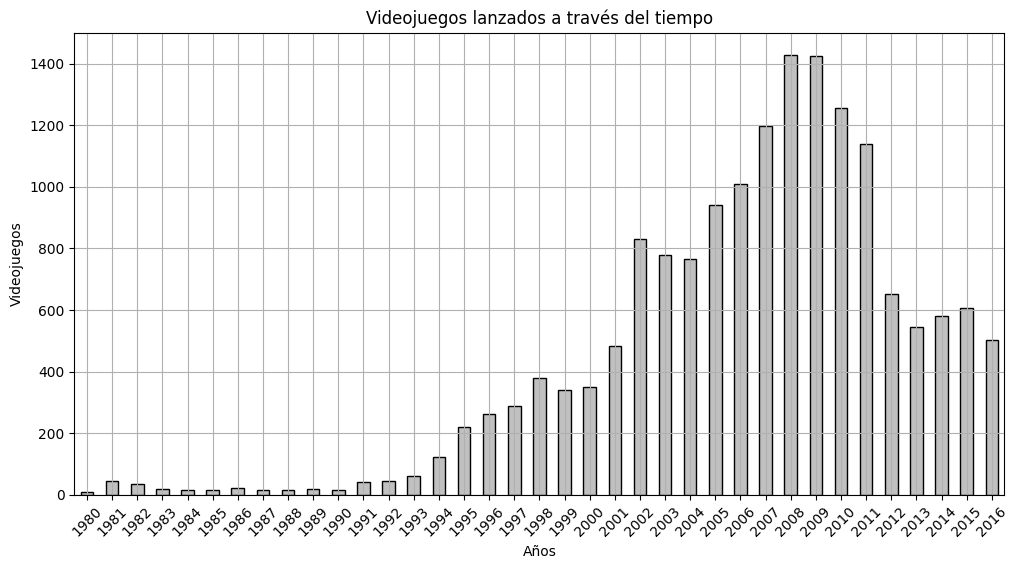

In [11]:
games_lanzados = games.groupby('year_of_release')['name'].count()

games_lanzados.plot(kind= 'bar',
                    x= 'year_of_release',
                    y= 'name',
                    title= 'Videojuegos lanzados a través del tiempo',
                    figsize= (12,6),
                    color= 'silver',
                    edgecolor= 'black',
                    xlabel= 'Años',
                    ylabel= 'Videojuegos',
                    grid= True,
                    rot= 45,
                    legend= False
                    )

plt.show()


*Con base en el gráfico realizado podemos notar que a partir del año 2002 los lanzamientos de videojuegos incrementaron considerablemente, por lo que a partir de esa fecha podemos decir que los datos son significativos.*

**2.2 Compararemos la variación del top 10 en ventas por plataforma**

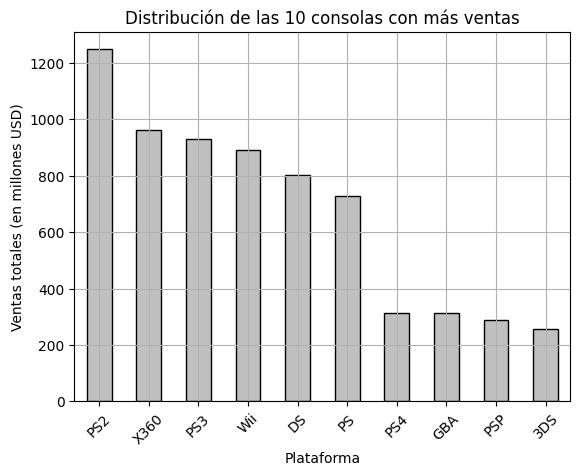

In [12]:
games_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending= False)

genre= games_sales.head(10)

genre.plot(kind= 'bar', color= 'silver', edgecolor= 'black', rot= 45)
plt.title('Distribución de las 10 consolas con más ventas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (en millones USD)')
plt.grid(True)
plt.show()



*Determinamos que éstas son las 10 consolas más rentables segun sus ventas en los últimos años*

**2.3 Analizaremos el comportamiento de las consolas a lo largo del tiempo, para poder determinar cuanto tiempo tandan las consolas en desaparecer o en surgir**

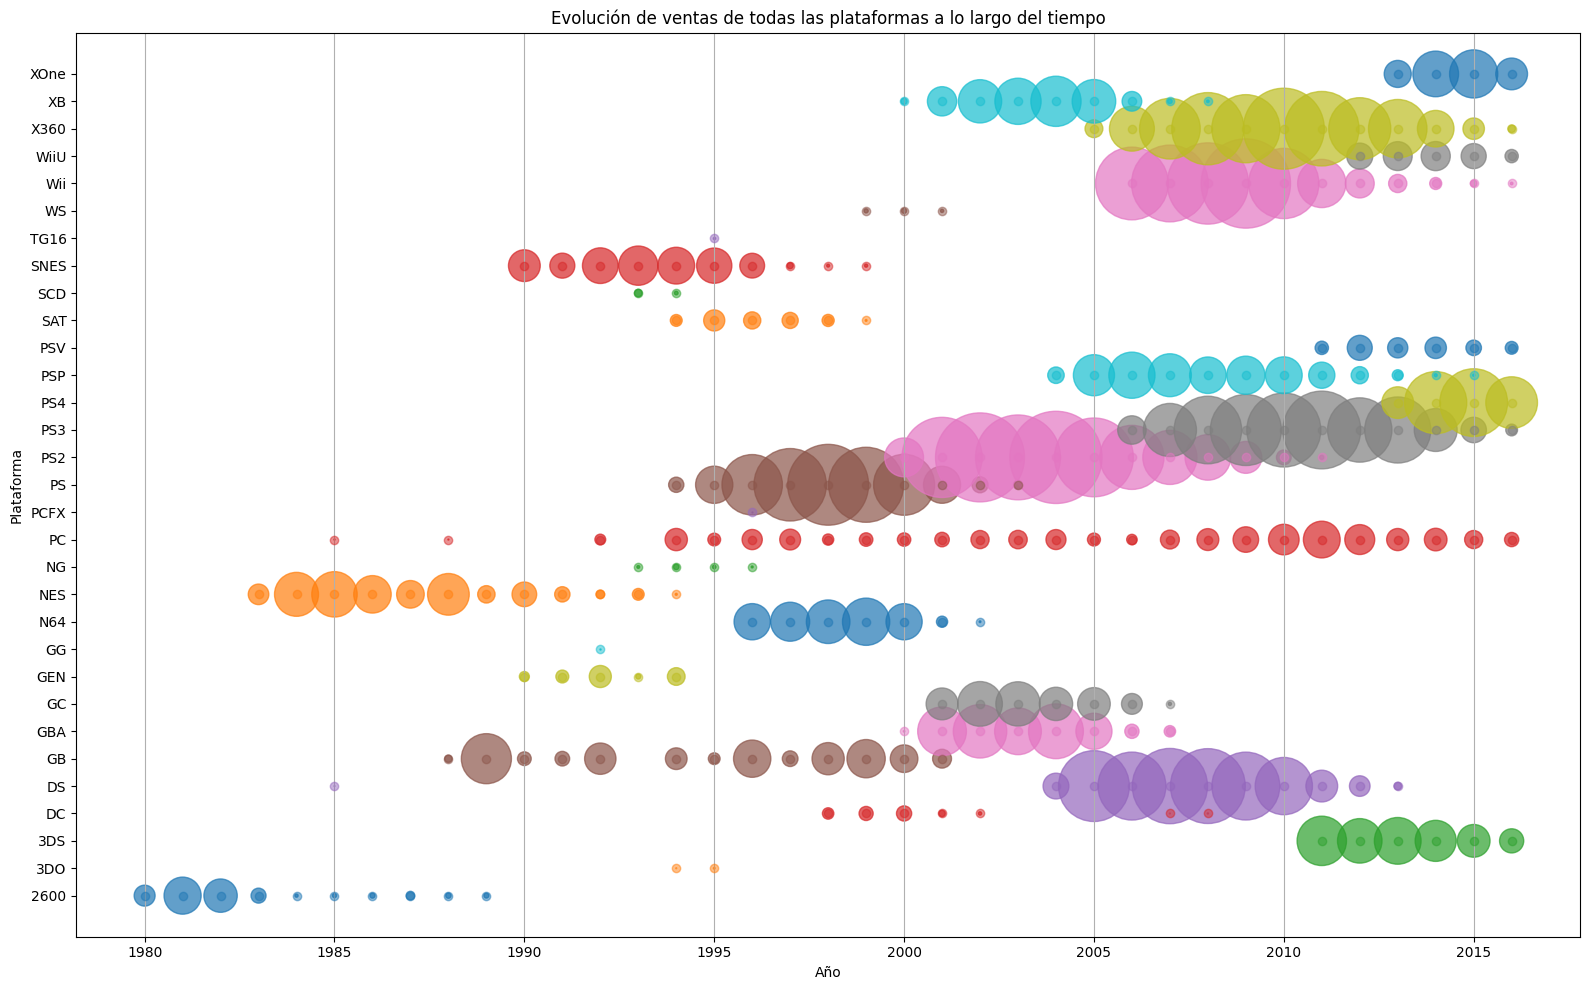

In [13]:
# Agrupa ventas por plataforma y año para todas las plataformas
ventas_por_anio = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
todas_las_plataformas = ventas_por_anio['platform'].unique()

plt.figure(figsize=(16, 10))
for i, plataforma in enumerate(todas_las_plataformas):
    datos = ventas_por_anio[ventas_por_anio['platform'] == plataforma]
    plt.plot(datos['year_of_release'], [i]*len(datos), marker='o', linewidth=0, label=plataforma, alpha=0.5)
    plt.scatter(datos['year_of_release'], [i]*len(datos), s=datos['total_sales']*20, alpha=0.7)

plt.yticks(range(len(todas_las_plataformas)), todas_las_plataformas)
plt.xlabel('Año')
plt.ylabel('Plataforma')
plt.title('Evolución de ventas de todas las plataformas a lo largo del tiempo')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

*Podemos observar que el rango de años en que una consola solia perdurar es de aporximadamente 10 años*


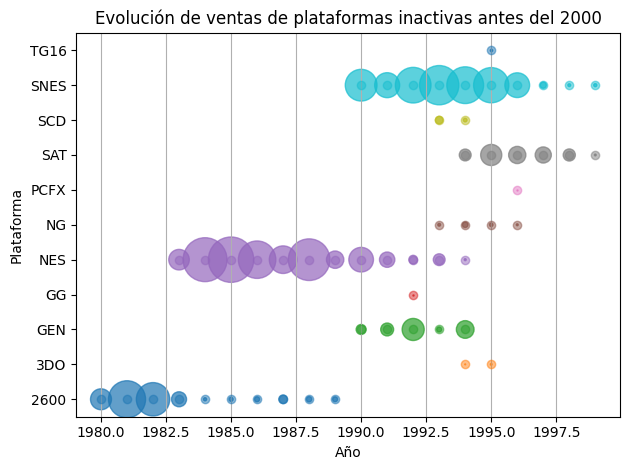

In [14]:
#Filtramos plataformas inactivas antes del 2000
platform_old = games.groupby('platform')['year_of_release'].max().reset_index()
platform_old.columns= ['plataforma', 'ultimo año de ventas']
plataformas_inactivas = platform_old[platform_old['ultimo año de ventas']< 2000]['plataforma']

#Filtramos ventas de solo esas plataformas
ventas_inactivas = games[games['platform'].isin(plataformas_inactivas)]


#Agrupamos ventas por plataforma y año
ventas_por_año = ventas_inactivas.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

#Graficamos las ventas a través del tiempo para cada plataforma inactiva
plt.Figure(figsize= (14,8))
for i, plataforma in enumerate(plataformas_inactivas):
    datos = ventas_por_año[ventas_por_año['platform'] == plataforma]
    plt.plot(datos['year_of_release'], [i]*len(datos), marker='o', linewidth=0, label=plataforma, alpha=0.5)
    plt.scatter(datos['year_of_release'], [i]*len(datos), s=datos['total_sales']*20, alpha=0.7)

plt.yticks(range(len(plataformas_inactivas)), plataformas_inactivas)
plt.xlabel('Año')
plt.ylabel('Plataforma')
plt.title('Evolución de ventas de plataformas inactivas antes del 2000')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


*Con base en el análisis general pudimos notar que varias consolas dejaron de ser populares antes del nuevo milenio, esto debiendose a la llegada de las nuevas*

**Ejemplo de un heatmap**

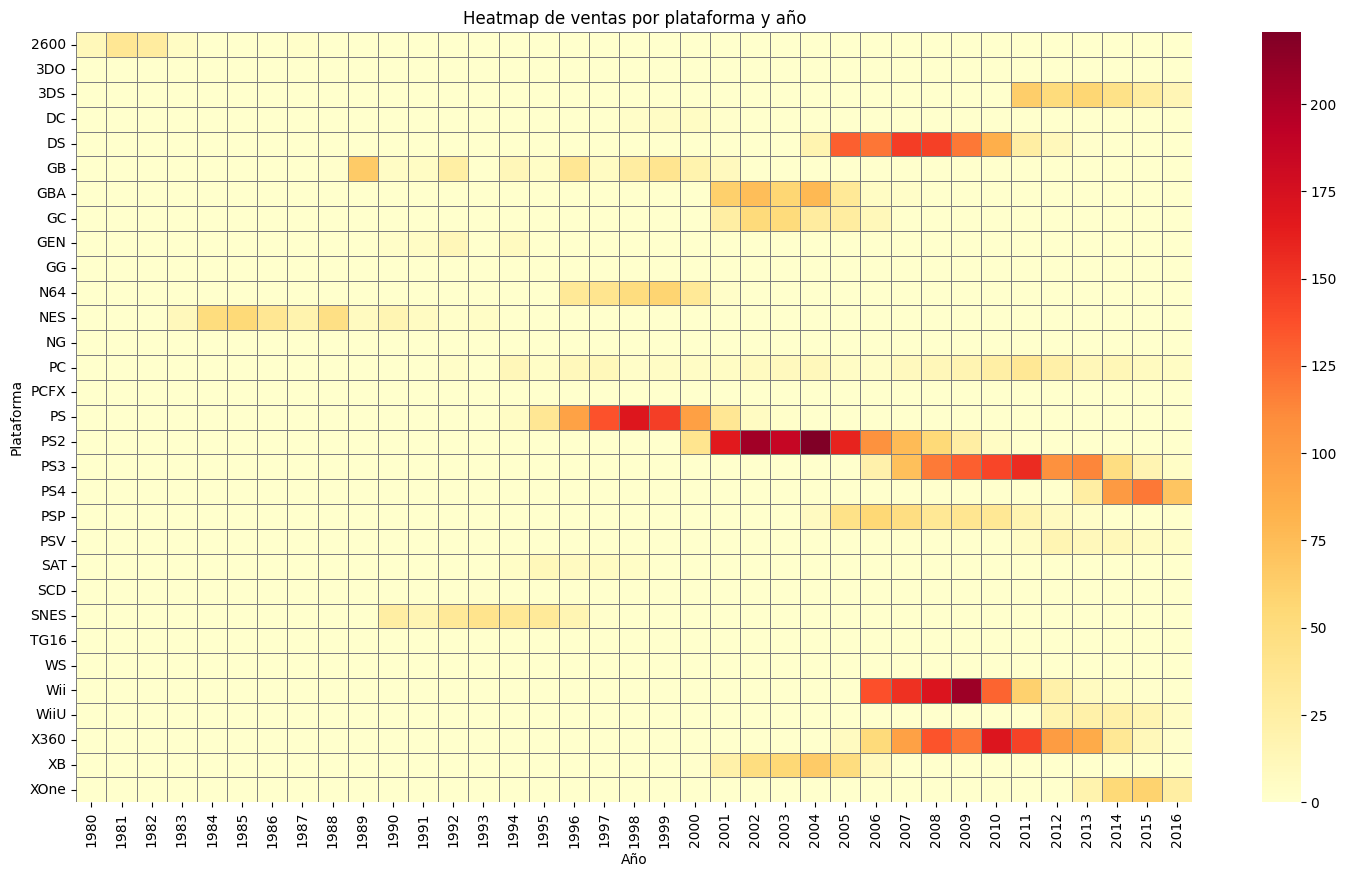

In [15]:
# Agrupa ventas por plataforma y año
ventas_por_anio = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Crea una tabla pivote: filas=plataforma, columnas=año, valores=ventas
tabla_heatmap = ventas_por_anio.pivot(index='platform', columns='year_of_release', values='total_sales').fillna(0)

plt.figure(figsize=(18, 10))
sns.heatmap(tabla_heatmap, cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title('Heatmap de ventas por plataforma y año')
plt.xlabel('Año')
plt.ylabel('Plataforma')
plt.show()

**2.4 Buscaremos las plataformas lideres de ventas y observaremos cuales crecen y cuales reducen sus ventas con el paso del tiempo**

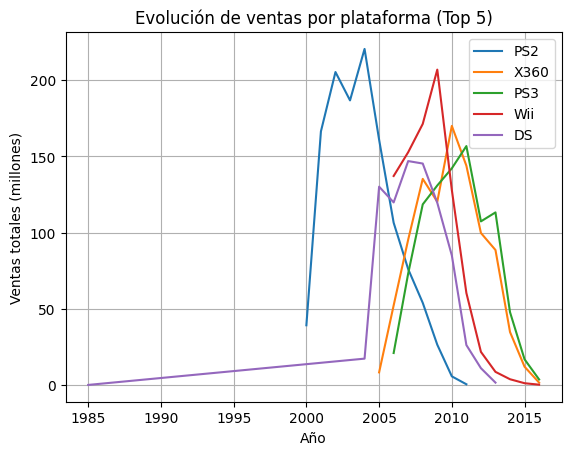

In [16]:
# Agrupa ventas por plataforma y año
ventas_por_año = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Ejemplo de gráfico para las 5 plataformas más vendidas
plataformas_top = genre.index[:5]
for plataforma in plataformas_top:
    datos = ventas_por_año[ventas_por_año['platform'] == plataforma]
    plt.plot(datos['year_of_release'], datos['total_sales'], label=plataforma)

plt.title('Evolución de ventas por plataforma (Top 5)')
plt.xlabel('Año')
plt.ylabel('Ventas totales (millones)')
plt.legend()
plt.grid(True)
plt.show()

*De las 5 consolas más rentables notamos que PS2 y DS tuvieron un gran crecimiento pero no lograron pasar la barrera de los 10 que tardan en desaparecer, debemos tomar en cuenta que pueden ser sustituidas por las nuevas generaciones de consolas, por ejemplo PS2 por PS3, PS4 y así sucesivamente*

**2.5 Analizaremos que tan significativas son las diferencias en las ventas globales de los videojuegos por plataforma**

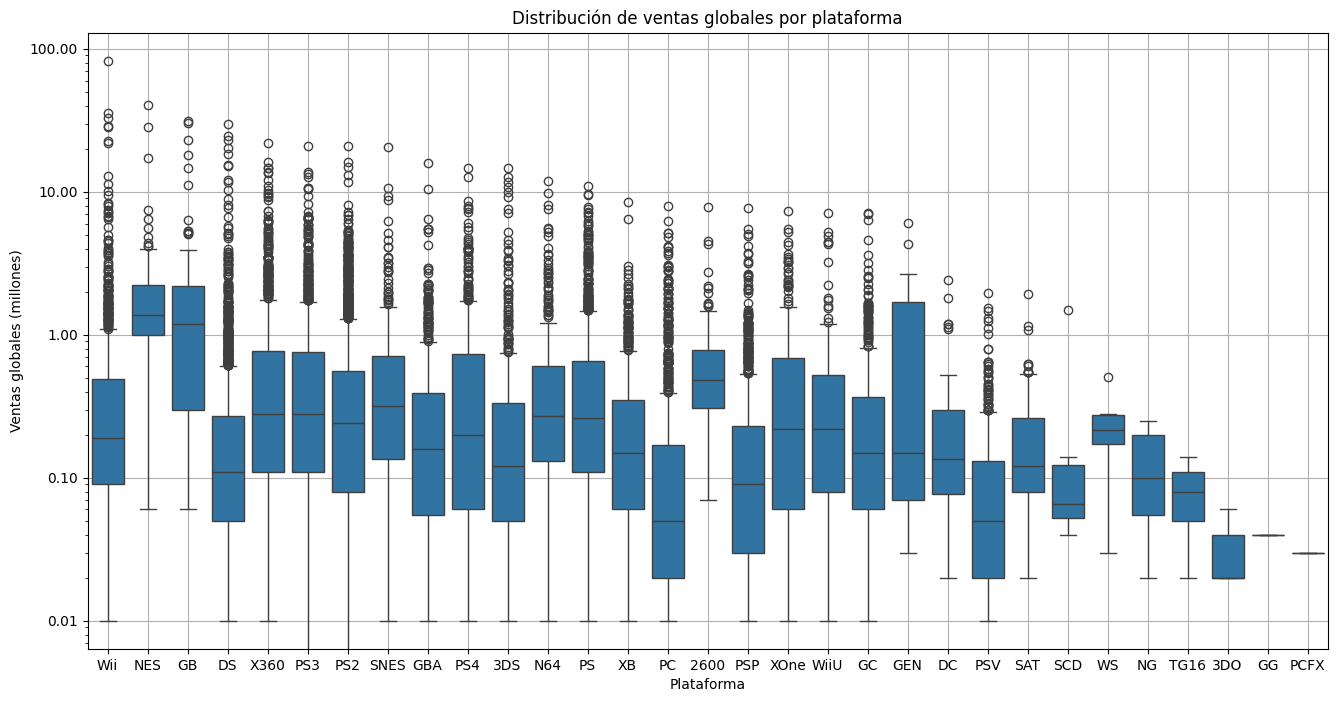

In [17]:


plt.figure(figsize=(16, 8))
sns.boxplot(x='platform', y='total_sales', data=games)
plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.yscale('log')  # Opcional: escala logarítmica para ver mejor la dispersión
plt.grid(True)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
plt.show()

*Notamos que no hay una diferencia significativa en el promedio de ventas en todos los videojuegos, ya que la mayoría las ventas se mantienen en un rango por debajo del millon de USD*

**2.6 Calcularemos la correlación que existe entre las reseñas de los criticos y usuarios con las ventas obtenidas**

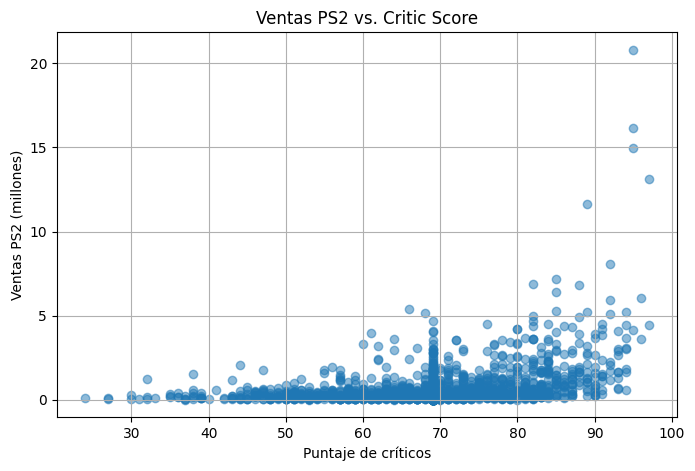

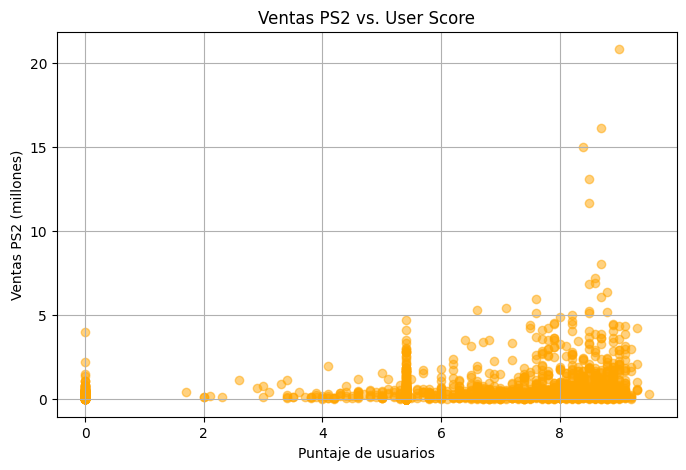

Correlación entre Critic Score y ventas: 0.37
Correlación entre User Score y ventas: 0.23


In [18]:

grand = games[games['platform'] == 'PS2']

# Gráfico de dispersión: Critic Score vs Ventas
plt.figure(figsize=(8, 5))
plt.scatter(grand['critic_score'], grand['total_sales'], alpha=0.5)
plt.title('Ventas PS2 vs. Critic Score')
plt.xlabel('Puntaje de críticos')
plt.ylabel('Ventas PS2 (millones)')
plt.grid(True)
plt.show()

# Gráfico de dispersión: User Score vs Ventas
plt.figure(figsize=(8, 5))
plt.scatter(grand['user_score'], grand['total_sales'], alpha=0.5, color='orange')
plt.title('Ventas PS2 vs. User Score')
plt.xlabel('Puntaje de usuarios')
plt.ylabel('Ventas PS2 (millones)')
plt.grid(True)
plt.show()

# Calcular correlación
cor_critic = grand['critic_score'].corr(grand['total_sales'])
cor_user = grand['user_score'].corr(grand['total_sales'])

print(f'Correlación entre Critic Score y ventas: {cor_critic:.2f}')
print(f'Correlación entre User Score y ventas: {cor_user:.2f}')

*Podemos notar que aunque la correlacion es positiva no es tan fuerte como para poder determinar que a mayor puntaje hay mayores ventas*

**2.7 Compararemos las correlaciones de las reseñas con las ventas de un mismo videojuego pero diferente plataforma, para observar las diferencias**

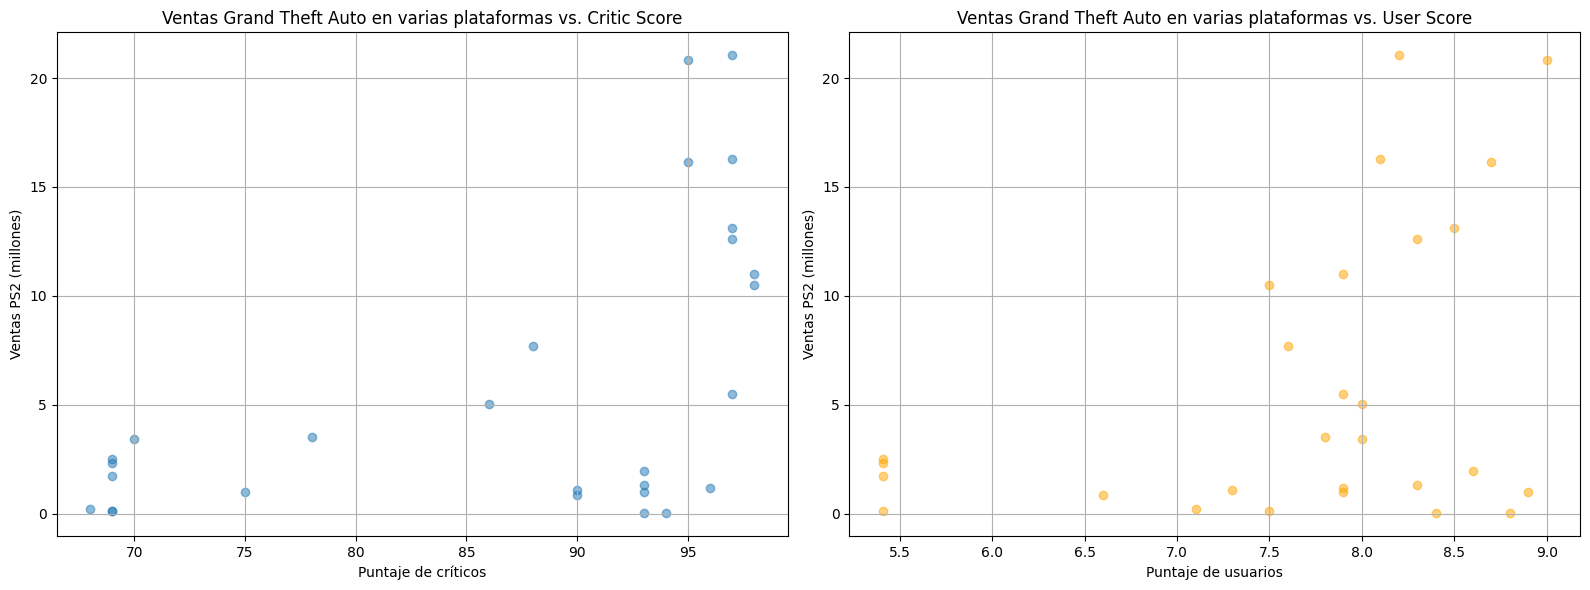

Correlación entre Critic Score y ventas: 0.53
Correlación entre User Score y ventas: 0.39


In [19]:
# Generamos filtro para analizar el videojuego en todas sus plataformas disponibles
grand= games[games['name'].str.contains('Grand Theft Auto', case=False, na=False) ]

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Primer scatter: Critic Score vs Ventas
axs[0].scatter(grand['critic_score'], grand['total_sales'], alpha=0.5)
axs[0].set_title('Ventas Grand Theft Auto en varias plataformas vs. Critic Score')
axs[0].set_xlabel('Puntaje de críticos')
axs[0].set_ylabel('Ventas PS2 (millones)')
axs[0].grid(True)

# Segundo scatter: User Score vs Ventas
axs[1].scatter(grand['user_score'], grand['total_sales'], alpha=0.5, color='orange')
axs[1].set_title('Ventas Grand Theft Auto en varias plataformas vs. User Score')
axs[1].set_xlabel('Puntaje de usuarios')
axs[1].set_ylabel('Ventas PS2 (millones)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Calcular correlación
cor_critic = grand['critic_score'].corr(grand['total_sales'])
cor_user = grand['user_score'].corr(grand['total_sales'])

print(f'Correlación entre Critic Score y ventas: {cor_critic:.2f}')
print(f'Correlación entre User Score y ventas: {cor_user:.2f}')



*Podemos observar que existe una correlación positiva con respecto a las críticas (criticos y usuarios), y las ventas, ya que a mayor puntaje de crítica mayores son las ventas*

**2.8 Analizaremos la distribucion de las ventas por los generos de los videojuegos**

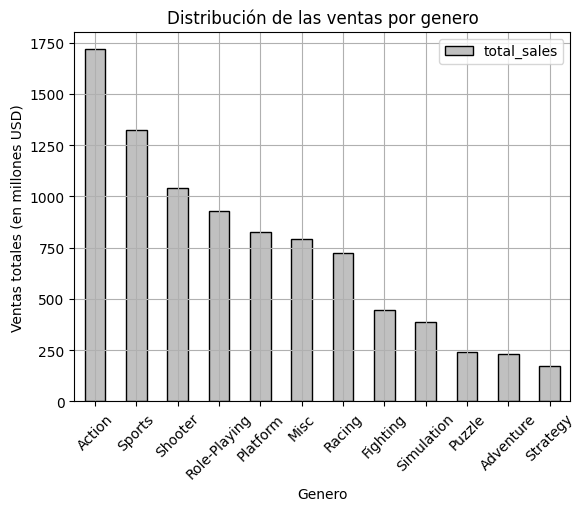

In [20]:
genre= games.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False).set_index('genre')

genre.plot(kind= 'bar', color= 'silver', edgecolor= 'black', rot= 45)
plt.title('Distribución de las ventas por genero')
plt.xlabel('Genero')
plt.ylabel('Ventas totales (en millones USD)')
plt.grid(True)
plt.show()



*Según nuestro análisis podemos observar que los juegos de acción, sports y shooter son los más rentables*
*; Por otro lado podemos generalizar que los juegos de alto impacto emocional sulen vender más*

# Perfil de usuario para cada región

**3.1 Cuota de mercado para cada plataforma**

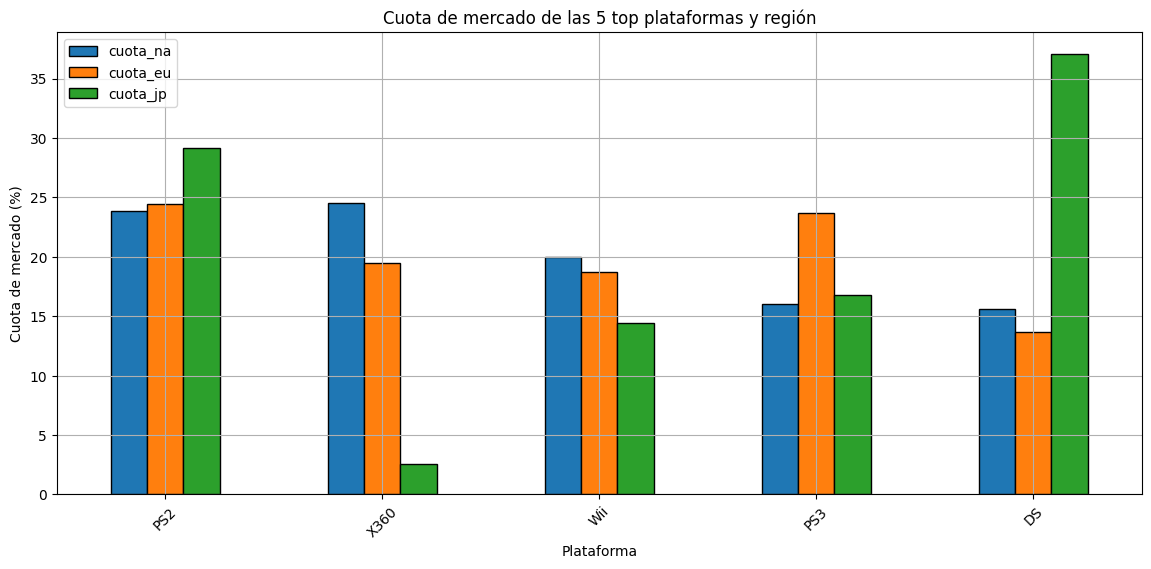

In [21]:
#Calculamos las ventas por plataforma en todas las regiones 

sales_platform= games.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum()

#Seleccionamos las 5 plataformas más rentables
sales_platform['total_sales'] = sales_platform[['na_sales','eu_sales','jp_sales']].sum(axis=1)
top_5 = sales_platform.sort_values(by='total_sales', ascending=False).head(5)


#Sumamos las ventas totales por región

total_na = top_5['na_sales'].sum()
total_eu = top_5['eu_sales'].sum()
total_jp = top_5['jp_sales'].sum()

#Calculamos la cuota de mercado de cada género en cada región

top_5['cuota_na'] = top_5['na_sales'] / total_na * 100
top_5['cuota_eu'] = top_5['eu_sales'] / total_eu * 100
top_5['cuota_jp'] = top_5['jp_sales'] / total_jp * 100

#Se muestran los resultados ordenados

top_5[['cuota_na', 'cuota_eu', 'cuota_jp']].sort_values(by= 'cuota_na', ascending=False).round(2)

#Lo representamos en un gráfico para mayor entendimiento

top_5[['cuota_na', 'cuota_eu', 'cuota_jp']].plot(kind= 'bar', figsize=(14,6), edgecolor= 'black', rot= 45)
plt.title('Cuota de mercado de las 5 top plataformas y región')
plt.xlabel('Plataforma')
plt.ylabel('Cuota de mercado (%)')
plt.grid(True)
plt.show()



*Descripciónde de la participación de mercado por plataforma:*
* PS2: Se observa que Japón es la región que más la utiliza pero no por muchos puntos porcentuales y en general es la consola más utilizada por todas las regiones.
* X360: A diferencia de ps2 notamos que Japón no sule usar ésta consola, vemos que Norte América la prefiere sobre todas las demás.
* Wii: Nortamos que se encuentra en un punto medio, ya que no es tán utilizada pero tampoco es las que más prefieran las distintas regiones.
* PS3: Vemos que Europa prefiere ésta cosola al igual que PS2 lo que nos demuestra sus preferencias con PlayStation.
* DS: Sin duda es la preferida de Japón.

**3.2 Describiremos los 5 generos principales o los más rentables**

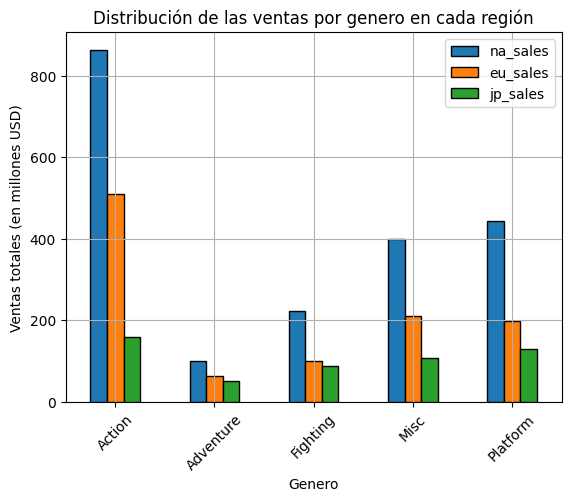

In [22]:
#Calculamos las ventas por gerero en cada región
rating_sales= games.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum()
rating_sales['total_sales'] = rating_sales[['na_sales','eu_sales','jp_sales']].sum()
#Seleccionamos los top5 generos más rentables
genre_top5= rating_sales.sort_values(by='total_sales', ascending=False).head(5)
#Sumamos las ventas por cada región
genre_na= genre_top5['na_sales'].sum()
genre_eu= genre_top5['eu_sales'].sum()
genre_jp= genre_top5['jp_sales'].sum()

genre_top5[['na_sales','eu_sales','jp_sales']]
#Graficamos para un mejor entendimiento
genre_top5[['na_sales','eu_sales','jp_sales']].plot(kind= 'bar', edgecolor= 'black', rot= 45)
plt.title('Distribución de las ventas por genero en cada región')
plt.xlabel('Genero')
plt.ylabel('Ventas totales (en millones USD)')
plt.grid(True)
plt.show()

*Podemos notar que Norte Amperica es la región con más participacion en el mercado en el top5 de generos seguido de Europa*

**3.3 Validaremos si las clasificaciones ESRB afectan las ventas de cadaregión**

In [23]:
#Validamos todas las categorías que hay en nuestro df
games['rating'].unique()

array(['E', 'unclassified', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [24]:
#Sustituimos la nomenclatura por un nombre que nos ayude a identificar más facilmente la clasificación
games['rating'].replace('E','Everyone',inplace=True)
games['rating'].replace('M','Mature',inplace=True)
games['rating'].replace('T','Teen',inplace=True)
games['rating'].replace('E10+','Everyone 10+',inplace=True)
games['rating'].replace('K-A','Eveyone',inplace=True)
games['rating'].replace('AO','18+',inplace=True)
games['rating'].replace('EC','3+',inplace=True)
games['rating'].replace('RP','Rating pending',inplace=True)

games['rating'].head(20)

C:\Users\ralf_\AppData\Local\Temp\ipykernel_13964\3737753117.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['rating'].replace('E','Everyone',inplace=True)
C:\Users\ralf_\AppData\Local\Temp\ipykernel_13964\3737753117.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

0         Everyone
1     unclassified
2         Everyone
3         Everyone
4     unclassified
5     unclassified
6         Everyone
7         Everyone
8         Everyone
9     unclassified
10    unclassified
11        Everyone
12    unclassified
13        Everyone
14        Everyone
15        Everyone
16          Mature
17          Mature
18    unclassified
19        Everyone
Name: rating, dtype: object

C:\Users\ralf_\AppData\Local\Temp\ipykernel_13964\409804622.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['rating'].replace('Eveyone','Everyone',inplace=True)


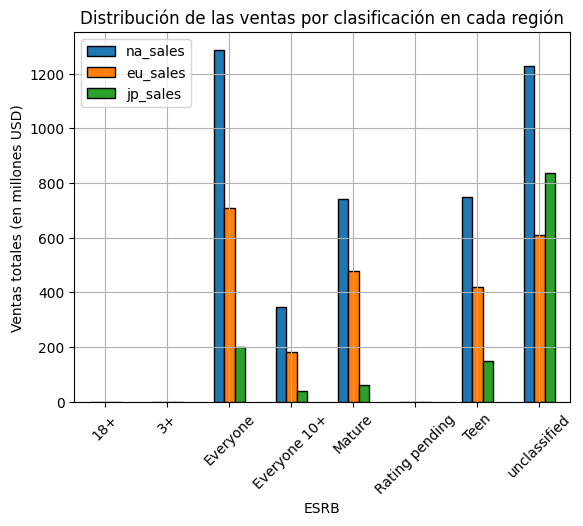

,na_sales,eu_sales,jp_sales,total_sales
rating,,,,
Everyone,1286.19,707.99,199.48,2193.66
unclassified,1228.23,611.27,836.78,2676.28
Teen,747.60,421.79,150.70,1320.09
Mature,742.95,480.25,63.58,1286.78
Everyone 10+,345.51,183.35,40.20,569.06
3+,1.53,0.11,0.00,1.64
18+,1.26,0.61,0.00,1.87
Rating pending,0.00,0.03,0.00,0.03


In [25]:
games['rating'].replace('Eveyone','Everyone',inplace=True)
#Calculamos y agrupamos las ventas por clasificación y región
rating_sales= games.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum()
rating_sales['total_sales'] = rating_sales[['na_sales','eu_sales','jp_sales']].sum(axis=1)
#Sumamos las ventas por cada región
rating_na = rating_sales['total_sales'].sum()
rating_eu = rating_sales['total_sales'].sum()
rating_jp = rating_sales['total_sales'].sum()

rating_sales[['na_sales','eu_sales','jp_sales', 'total_sales']].sort_values(by='na_sales',ascending=False).round(2)
#Graficamos los resultados para su análisis
rating_sales[['na_sales','eu_sales','jp_sales']].plot(kind= 'bar', edgecolor= 'black', rot= 45)
plt.title('Distribución de las ventas por clasificación en cada región')
plt.xlabel('ESRB')
plt.ylabel('Ventas totales (en millones USD)')
plt.grid(True)
plt.show()

rating_sales[['na_sales','eu_sales','jp_sales', 'total_sales']].sort_values(by='na_sales',ascending=False).round(2)



*Podemos validar que las clasificaciones si impactan a las ventas de los videojuegos, como ejemplo los juegos con clasificación "Everyone" se venden mucho más que los juegos "18+" lo que puede significar que no haya muchos juegos con esa categoría*

# Prueba de Hipótesis

**4 Probaremos la siguiente hipótesis:**
* Las calificaciones de los usuarios para las plataformas Xbox One y PC son las mismas?
* Consideraremos un valor alpha de 0.05

In [31]:
#Identificamos nuestras muestras a analizar
cal_user_xone = games[games['platform'] == 'XOne']['user_score']
cal_user_pc = games[games['platform'] == 'PC']['user_score']
#Realizamos las pruebas
t_statistic, p_value = stats.ttest_ind(cal_user_xone, cal_user_pc)
print(f"Estadístico t: {t_statistic:.2f}")
print(f"Valor p: {p_value:.4f}")



Estadístico t: -3.10
Valor p: 0.0020


C:\Users\ralf_\AppData\Local\Temp\ipykernel_13964\3401248643.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cal_user_xone, cal_user_pc], labels=['Score_Xbox One', 'Score_PC'])


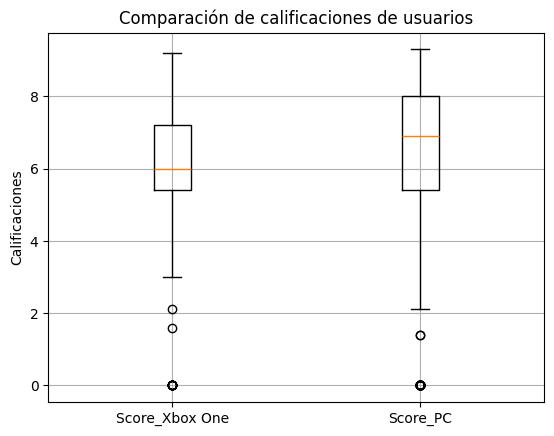

In [32]:
plt.boxplot([cal_user_xone, cal_user_pc], labels=['Score_Xbox One', 'Score_PC'])
plt.title('Comparación de calificaciones de usuarios')
plt.ylabel('Calificaciones')
plt.grid(True)
plt.show()

*Con base en nuestros resultados podemos rechazar la hipótesis nula ya que hay suficiente evidencia de que las calificaciones en ambas plataformas son significativamente diferentes*

**4.1 Porbaremos la siguiente hipótesis**
* Las calificaciones promedio de los usuarios en los géneros acción y deportes, son las mismas? 

In [36]:
cal_gen_action = games[games['genre'] == 'Action']['user_score']
cal_gen_sport = games[games['genre'] == 'Sports']['user_score']

t_statistic , p_value = stats.ttest_ind(cal_gen_action,cal_gen_sport)
print(f"Estadístico t: {t_statistic:.2f}")
print(f"Valor p: {p_value:.10f}")

Estadístico t: 7.52
Valor p: 0.0000000000


C:\Users\ralf_\AppData\Local\Temp\ipykernel_13964\129681315.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cal_gen_action, cal_gen_sport], labels=['Score_Action', 'Score_Sports'])


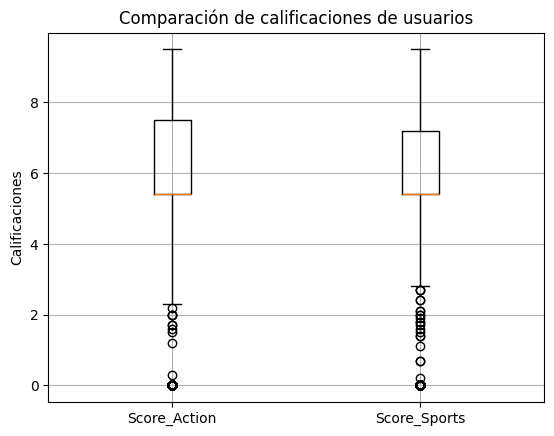

In [35]:
plt.boxplot([cal_gen_action, cal_gen_sport], labels=['Score_Action', 'Score_Sports'])
plt.title('Comparación de calificaciones de usuarios')
plt.ylabel('Calificaciones')
plt.grid(True)
plt.show()

*Con base en el cálculo podemos ver que nuestro valor p es mucho menor que nuestro valor Alpha = 0.05 por lo que podemos rechazar la hipótesis nula ya que hay evidencia suficiente para decir que los usuarios califican diferente a los géneros Action y Sports*